In [ ]:
############################
## Data about PATIENTS.csv #
############################



In [10]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [22]:
### Read csv file and display first 5 rows ###
file_name = 'PATIENTS.csv'

patients_data = pd.read_csv(file_name)

print(patients_data.head(5))

   ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0     234         249      F  2075-03-13 00:00:00                  NaN   
1     235         250      F  2164-12-27 00:00:00  2188-11-22 00:00:00   
2     236         251      M  2090-03-15 00:00:00                  NaN   
3     237         252      M  2078-03-06 00:00:00                  NaN   
4     238         253      F  2089-11-26 00:00:00                  NaN   

              DOD_HOSP DOD_SSN  EXPIRE_FLAG  
0                  NaN     NaN            0  
1  2188-11-22 00:00:00     NaN            1  
2                  NaN     NaN            0  
3                  NaN     NaN            0  
4                  NaN     NaN            0  


In [23]:
### Display the last 5 rows ###
print(patients_data.tail(5))

       ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
46515   31840       44089      M  2026-05-25 00:00:00                  NaN   
46516   31841       44115      F  2124-07-27 00:00:00                  NaN   
46517   31842       44123      F  2049-11-26 00:00:00  2135-01-12 00:00:00   
46518   31843       44126      F  2076-07-25 00:00:00                  NaN   
46519   31844       44128      M  2098-07-25 00:00:00                  NaN   

                  DOD_HOSP DOD_SSN  EXPIRE_FLAG  
46515                  NaN     NaN            0  
46516                  NaN     NaN            0  
46517  2135-01-12 00:00:00     NaN            1  
46518                  NaN     NaN            0  
46519                  NaN     NaN            0  


In [14]:
### General information of patients_data ### 
print(patients_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       46520 non-null  int64 
 1   SUBJECT_ID   46520 non-null  int64 
 2   GENDER       46520 non-null  object
 3   DOB          46520 non-null  object
 4   DOD          15759 non-null  object
 5   DOD_HOSP     9974 non-null   object
 6   DOD_SSN      13378 non-null  object
 7   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB
None


In [19]:
### EXPIRE_FLAG = 1: People who have died ###
### shape[0]: row
### shape[1]: column

dead_count = patients_data[patients_data['EXPIRE_FLAG'] == 1].shape[0]
print("Number of dead people: ", dead_count)


Number of dead people:  15759


In [18]:
### EXPIRE_FLAG = 0: People who haven't died ###

alive_count = patients_data[patients_data['EXPIRE_FLAG'] == 0].shape[0]
print("Number of alive people: ", alive_count)

Number of alive people:  30761


In [20]:
### Number of female patients ###
female_patients_num = patients_data[patients_data['GENDER'] == 'F'].shape[0]
print("Number of female patients: ", female_patients_num)


Number of female patients:  20399


In [24]:
### Number of male patients ###
male_patients_num = patients_data[patients_data['GENDER'] == 'M'].shape[0]
print("Number of male patients: ", male_patients_num)

Number of male patients:  26121


In [58]:
patients_data['DOB'] = pd.to_datetime(patients_data['DOB'])
patients_data['DOD_HOSP'] = pd.to_datetime(patients_data['DOD_HOSP'], errors='coerce')
patients_data = patients_data.dropna(subset=['DOD_HOSP'])

In [55]:
print(patients_data['DOB'])

0       2075-03-13
1       2164-12-27
2       2090-03-15
3       2078-03-06
4       2089-11-26
           ...    
46515   2026-05-25
46516   2124-07-27
46517   2049-11-26
46518   2076-07-25
46519   2098-07-25
Name: DOB, Length: 46520, dtype: datetime64[ns]


In [56]:
print(patients_data['DOD_HOSP'])

0              NaT
1       2188-11-22
2              NaT
3              NaT
4              NaT
           ...    
46515          NaT
46516          NaT
46517   2135-01-12
46518          NaT
46519          NaT
Name: DOD_HOSP, Length: 46520, dtype: datetime64[ns]


In [68]:
### Create a new column: AGE_AT_DEATH ###
patients_data['AGE_AT_DEATH'] = (patients_data['DOD_HOSP'].dt.year - patients_data['DOB'].dt.year)
print(patients_data['AGE_AT_DEATH'])

1         24
7         90
10        77
12        64
17        66
        ... 
46496     88
46497    300
46505     76
46513     57
46517     86
Name: AGE_AT_DEATH, Length: 9974, dtype: int32


In [70]:
print("Minimum age death: ", patients_data['AGE_AT_DEATH'].min())
print("Maximum age death: ", patients_data['AGE_AT_DEATH'].max())


Minimum age death:  0
Maximum age death:  311


In [82]:
### Frequency of age ###
age_frequency = patients_data['AGE_AT_DEATH'].value_counts().sort_index()
print(age_frequency)

### Left column: Age 
### Right column: Frequency

AGE_AT_DEATH
0      62
1       2
15      1
16      1
17      6
       ..
307    12
308     6
309     9
310     2
311     2
Name: count, Length: 96, dtype: int64


In [83]:
patients_data['DEAD_FREQUENCY'] = patients_data['AGE_AT_DEATH'].map(age_frequency)
print(patients_data.head(5))

### 11 people died at age 24, 38 people died at age 90, etc ###


    ROW_ID  SUBJECT_ID GENDER        DOB        DOD   DOD_HOSP  \
1      235         250      F 2164-12-27 2164-12-27 2188-11-22   
7      241         257      F 2031-04-03 2031-04-03 2121-07-08   
10     244         261      M 2025-08-04 2025-08-04 2102-06-29   
12     246         263      M 2104-06-18 2104-06-18 2168-06-13   
17     251         268      F 2132-02-21 2132-02-21 2198-02-18   

                DOD_SSN  EXPIRE_FLAG  AGE_AT_DEATH  DEAD_FREQUENCY  
1                   NaN            1            24              11  
7   2121-07-08 00:00:00            1            90              38  
10  2102-06-29 00:00:00            1            77             282  
12                  NaN            1            64             184  
17                  NaN            1            66             209  


In [67]:
### Plot the AGE_AT_DEATH and DEAD_FREQUENCY using Histogram ###

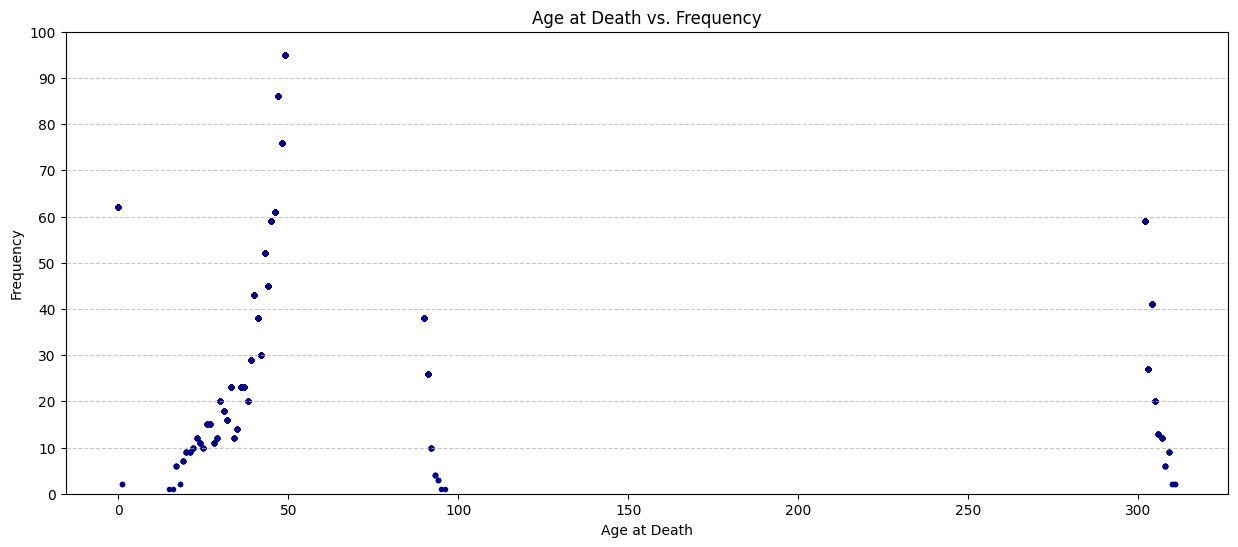

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.scatter(patients_data['AGE_AT_DEATH'], patients_data['DEAD_FREQUENCY'], color='darkblue', marker='.')
plt.title('Age at Death vs. Frequency')
plt.xlabel('Age at Death')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
plt.show()
